In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
# a function that print all the metrics mentioned above
def print_metrics(y_true, y_original, y_stemmed):
    # calculate the Mean Absolute Error between correct_rate and c_w_p_m return a single value
    from sklearn.metrics import mean_absolute_error
    # calculate the Mean Absolute percentage Error between correct_rate and c_w_p_m return a single value
    # print original and stemmed in one line
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    # calculate the Mean Square percentage Error between correct_rate and c_w_p_m return a single value
    # print original and stemmed
    def mean_squared_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.square((y_true - y_pred) / y_true)) * 100
    # calculate the Mean Square Error between correct_rate and c_w_p_m return a single value
    from sklearn.metrics import mean_squared_error
    # a function that calculate the Mean Absolute Error of middle 60% of the Error between correct_rate and c_w_p_m
    # print original and stemmed in one line
    def mean_absolute_error_middle_60(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        error = np.abs((y_true - y_pred))
        error = np.sort(error)
        error = error[int(len(error) * 0.2):int(len(error) * 0.8)]
        return np.mean(error)
    # a function that calculate the Mean Absolute percentage Error of middle 60% of the Error between correct_rate and c_w_p_m a
    def mean_absolute_percentage_error_middle_60(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        error = np.abs((y_true - y_pred) / y_true)
        error = np.sort(error)
        error = error[int(len(error) * 0.2):int(len(error) * 0.8)]
        return np.mean(error) * 100
    print('MAE original: ', mean_absolute_error(y_true, y_original))
    print('MAE stemmed: ', mean_absolute_error(y_true, y_stemmed))
    print('MAPE original: ', mean_absolute_percentage_error(y_true, y_original))
    print('MAPE stemmed: ', mean_absolute_percentage_error(y_true, y_stemmed))
    print('MSE original: ', mean_squared_error(y_true, y_original))
    print('MSE stemmed: ', mean_squared_error(y_true, y_stemmed))
    print('MSPE original: ', mean_squared_percentage_error(y_true, y_original))
    print('MSPE stemmed: ', mean_squared_percentage_error(y_true, y_stemmed))
    print('MAE middle 60% original: ', mean_absolute_error_middle_60(y_true, y_original))
    print('MAE middle 60% stemmed: ', mean_absolute_error_middle_60(y_true, y_stemmed))
    print('MAPE middle 60% original: ', mean_absolute_percentage_error_middle_60(y_true, y_original))
    print('MAPE middle 60% stemmed: ', mean_absolute_percentage_error_middle_60(y_true, y_stemmed))

In [3]:
# read yrs12_asr_scoring_words_raw.csv
df = pd.read_csv('./DataFolder/Original_CSV/yrs12_word.csv')

/var/folders/1v/x2fb1jkd4878lndzgpm1btm40000gn/T/ipykernel_99402/1346083944.py:2: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./DataFolder/Original_CSV/yrs12_word.csv')


In [4]:
# return student id is 1 and passage id is 24000
df[(df['student_id'] == 1) & (df['passage_id'] == 24000)]

,student_id,passage_id,session_id,year,badaudio,grade,length,totalwords_passage,wordposition_passage,ref,hyp,start,end,score_asr,score_traditional,score_criterion,lastwordreadposition_traditional,lastwordposition_criterion,sec_traditional
446610,1,24000,56df1ab8df17d,2,no,2,4,258,1,LIZ,NaN,139.0,164.0,1.0,1.0,1.0,111.0,101.0,60.0
446611,1,24000,56df1ab8df17d,2,no,2,4,258,2,AND,NaN,165.0,180.0,1.0,1.0,1.0,111.0,101.0,60.0
446612,1,24000,56df1ab8df17d,2,no,2,4,258,3,KATE,NaN,181.0,214.0,1.0,1.0,1.0,111.0,101.0,60.0
446613,1,24000,56df1ab8df17d,2,no,2,4,258,4,LOVED,NaN,233.0,282.0,1.0,1.0,1.0,111.0,101.0,60.0
446614,1,24000,56df1ab8df17d,2,no,2,4,258,5,TO,NaN,286.0,321.0,1.0,1.0,1.0,111.0,101.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446863,1,24000,56df1ab8df17d,2,no,2,4,258,254,PANCAKES,NaN,NaN,NaN,NaN,NaN,NaN,111.0,101.0,60.0
446864,1,24000,56df1ab8df17d,2,no,2,4,258,255,WOULD,NaN,NaN,NaN,NaN,NaN,NaN,111.0,101.0,60.0
446865,1,24000,56df1ab8df17d,2,no,2,4,258,256,TASTE,NaN,NaN,NaN,NaN,NaN,NaN,111.0,101.0,60.0
446866,1,24000,56df1ab8df17d,2,no,2,4,258,257,MUCH,NaN,NaN,NaN,NaN,NaN,NaN,111.0,101.0,60.0


In [5]:
# set NAN and INF to 0 in score_asr
# convert score_asr to int
df['score_asr'] = df['score_asr'].fillna(0)
df['score_asr'] = df['score_asr'].replace([np.inf, -np.inf], 0)
df['score_asr'] = df['score_asr'].astype(int)

In [6]:
# group by student id, passage id and session id
# return the sum asr_score and the smallest value of start and the largest value of end
df2 = df.groupby(['student_id', 'passage_id', 'session_id']).agg({'score_asr': 'sum', 'start': 'min', 'end': 'max'})
#calculate the duration and drop the start and end columns and convert result from seconds to minutes
df2['duration'] = (df2['end'] - df2['start']) / 6000
df2 = df2.drop(columns=['start', 'end'])
#calculate the correct rate and convert result from seconds to minutes
df2['correct_rate'] = df2['score_asr'] / df2['duration']

In [7]:
# query the rows with index student_id == 1000 and passage_id == 31008
df2.loc[(405, 21072)]

,score_asr,duration,correct_rate
session_id,,,
55428d8298d7a,22,0.243,90.534979


In [8]:
# read another csv c_w_p_m.csv
df3 = pd.read_csv('c_w_p_m.csv')
#seperate the in 'file' column into 'student_id' and 'passage_id' and 'session_id'
#file column is in the format of student_{student_id}_passage_{passage_id}_{session_id}
df3[['student_id', 'passage_id', 'session_id']] = df3['file'].str.split('_', expand=True)[[1,3,4]]
#convert the student_id and passage_id to int
df3['student_id'] = df3['student_id'].astype(int)
df3['passage_id'] = df3['passage_id'].astype(int)
#drop the file column
df3 = df3.drop(columns=['file'])
#set a multi level index to student_id and passage_id and session_id
df3 = df3.set_index(['student_id', 'passage_id', 'session_id'])
# rename all the columns to original_{column_name}
df3 = df3.rename(columns=lambda x: 'original_' + x)

In [9]:
# read another csv c_w_p_m_stemmed.csv
# repeat the same process as above
df4 = pd.read_csv('c_w_p_m_stemmed.csv')
df4[['student_id', 'passage_id', 'session_id']] = df4['file'].str.split('_', expand=True)[[1,3,4]]
df4['student_id'] = df4['student_id'].astype(int)
df4['passage_id'] = df4['passage_id'].astype(int)
df4 = df4.drop(columns=['file'])
df4 = df4.set_index(['student_id', 'passage_id', 'session_id'])
# rename all the columns to stemmed_{column_name}
df4 = df4.rename(columns=lambda x: 'stemmed_' + x)

In [10]:
#join the three dataframes df2 df3 and df4 with index as keys
df5 = df2.join(df3, how='inner')
df5 = df5.join(df4, how='inner')
# sort by student_id and passage_id then session_id
df5 = df5.sort_values(by=['student_id', 'passage_id', 'session_id'])

In [11]:
# drop row if total word is smaller than 4
df6 = df5[df5['stemmed_total_word'] > 10]

In [12]:
df6.original_total_word.describe()

count    13029.000000
mean        37.364955
std         25.126135
min          8.000000
25%         20.000000
50%         26.000000
75%         46.000000
max        238.000000
Name: original_total_word, dtype: float64

In [13]:
df6

score_asr  duration  correct_rate  \
student_id passage_id session_id                                         
1          21001      56df1adae3bc1         28  0.224833    124.536694   
           21006      56df1bc708051         25  0.285833     87.463557   
           21114      56df1afc99fce         25  0.250833     99.667774   
           21117      56df1bdd39876         21  0.144667    145.161290   
           21127      56df1b9f547c5         27  0.369667     73.038774   
...                                        ...       ...           ...   
1059       32073      56ddf3abb8b66         48  0.478000    100.418410   
           33034      56ddf35c594c6         66  0.505333    130.606860   
           33035      56ddf3269d418         90  0.765667    117.544623   
           33037      56ddf2ee651cf         66  0.466500    141.479100   
           34000      56ddf2a8ae72b        134  1.221333    109.716157   

                                     original_time_diff  original_total_word  \
student_id passage_id session_id                                               
1          21001      56df1adae3bc1            0.212500                   26   
           21006      56df1bc708051            0.276333                   22   
           21114      56df1afc99fce            0.235333                   24   
           21117      56df1bdd39876            0.150333                   20   
           21127      56df1b9f547c5            0.311667                   24   
...                                                 ...                  ...   
1059       32073      56ddf3abb8b66            0.370000                   36   
           33034      56ddf35c594c6            0.507500                   61   
           33035      56ddf3269d418            0.605333                   72   
           33037      56ddf2ee651cf            0.472833                   37   
           34000      56ddf2a8ae72b            0.972500                   96   

                                     original_c_w_p_m  stemmed_time_diff  \
student_id passage_id session_id                                           
1          21001      56df1adae3bc1        122.352941           0.212500   
           21006      56df1bc708051         79.613993           0.281500   
           21114      56df1afc99fce        101.983003           0.235333   
           21117      56df1bdd39876        133.037694           0.150333   
           21127      56df1b9f547c5         77.005348           0.311667   
...                                               ...                ...   
1059       32073      56ddf3abb8b66         97.297297           0.370000   
           33034      56ddf35c594c6        120.197044           0.507500   
           33035      56ddf3269d418        118.942731           0.605333   
           33037      56ddf2ee651cf         78.251674           0.472833   
           34000      56ddf2a8ae72b         98.714653           0.976500   

                                     stemmed_total_word  stemmed_c_w_p_m  
student_id passage_id session_id                                          
1          21001      56df1adae3bc1                  26       122.352941  
           21006      56df1bc708051                  23        81.705151  
           21114      56df1afc99fce                  25       106.232295  
           21117      56df1bdd39876                  20       133.037694  
           21127      56df1b9f547c5                  25        80.213904  
...                                                 ...              ...  
1059       32073      56ddf3abb8b66                  36        97.297297  
           33034      56ddf35c594c6                  61       120.197044  
           33035      56ddf3269d418                  72       118.942731  
           33037      56ddf2ee651cf                  37        78.251674  
           34000      56ddf2a8ae72b                  98       100.358423  

[13029 rows x 9 columns]

In [14]:
df2.loc[(405, 21072)]

,score_asr,duration,correct_rate
session_id,,,
55428d8298d7a,22,0.243,90.534979


In [15]:
print_metrics(df5['correct_rate'], df5['original_c_w_p_m'], df5['stemmed_c_w_p_m'])
print('-----------Dropping Empty Result Below------------')
print_metrics(df6['correct_rate'], df6['original_c_w_p_m'], df6['stemmed_c_w_p_m'])

MAE original:  19.43742517766183
MAE stemmed:  17.96801027837258
MAPE original:  40.027014475486425
MAPE stemmed:  37.96266042816769
MSE original:  1263.341927607191
MSE stemmed:  1165.9517296809781
MSPE original:  23255.866452235798
MSPE stemmed:  23234.135312002356
MAE middle 60% original:  12.747693107724826
MAE middle 60% stemmed:  11.281751893609858
MAPE middle 60% original:  13.526965924633187
MAPE middle 60% stemmed:  12.113438473989358
-----------Dropping Empty Result Below------------
MAE original:  16.5608764105794
MAE stemmed:  15.13716129628083
MAPE original:  15.75464541694373
MAPE stemmed:  14.589210708428274
MSE original:  579.3639221058249
MSE stemmed:  516.6345018993496
MSPE original:  6.15577248332303
MSPE stemmed:  5.900499888097761
MAE middle 60% original:  12.129352973981408
MAE middle 60% stemmed:  10.624536798921286
MAPE middle 60% original:  12.098812168680796
MAPE middle 60% stemmed:  10.667989219892233


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


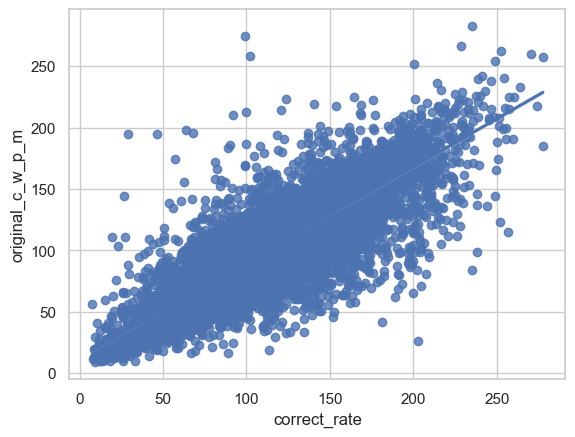

In [21]:
#Draw a Q-Q plot between correct_rate and c_w_p_m using seaborn
ax = sns.regplot(x="correct_rate", y="original_c_w_p_m", data=df6)
# save the plot as a eps file
ax.figure.savefig('correct_rate_original_c_w_p_m.eps', format='eps')

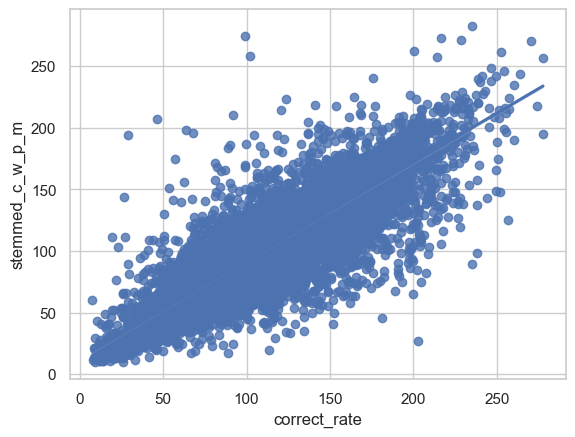

In [17]:
#Draw a Q-Q plot between correct_rate and c_w_p_m_stemmed using seaborn
ax = sns.regplot(x="correct_rate", y="stemmed_c_w_p_m", data=df6)

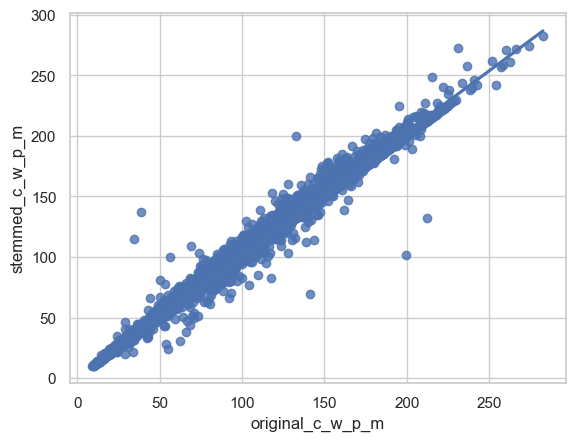

In [18]:
#Draw a Q-Q plot between c_w_p_m and c_w_p_m_stemmed using seaborn
ax = sns.regplot(x="original_c_w_p_m", y="stemmed_c_w_p_m", data=df6)

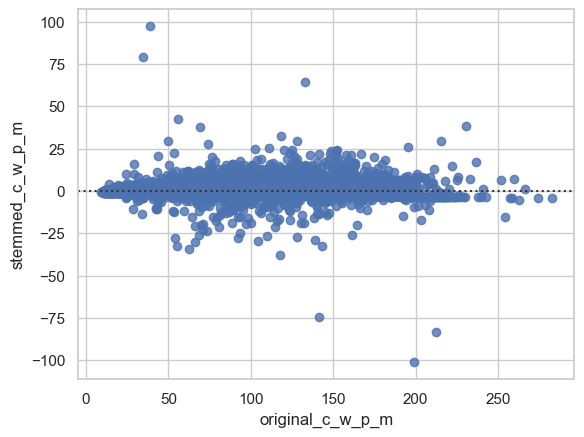

In [19]:
#Draw a Q-Q plot between c_w_p_m and c_w_p_m using seaborn
ax = sns.residplot(x="original_c_w_p_m", y="stemmed_c_w_p_m", data=df6)